## Simulating observations with MUSTANG-2

MUSTANG-2 is a bolometric array on the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope). In this notebook we simulate an observation of the Whirlpool Galaxy (M51).

ProjectedMap:
  shape(nu, y, x): (1, 500, 500)
  stokes: naive
  nu: [93.] GHz
  t: naive
  z: naive
  quantity: rayleigh_jeans_temperature
  units: K_RJ
    min: 0.000e+00
    max: 5.876e-02
  center:
    ra:  05ʰ34ᵐ31.80ˢ
    dec: 22°01’3.00”
  size(y, x): (8.83’, 8.83’)
  resolution(y, x): (1.06”, 1.06”)
  beam(maj, min, rot): (0°, 0°, 0°)
  memory: 4 MB


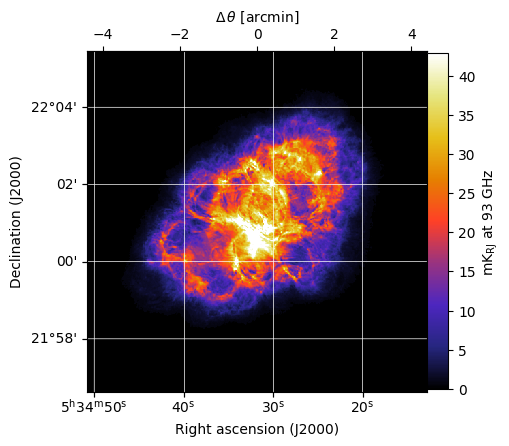

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/crab_nebula.fits"), nu=93e9)

input_map.plot()
print(input_map)

Plan:
  duration: 900 s
    start: 2025-07-13 13:36:25.236 +00:00
    end:   2025-07-13 13:51:25.236 +00:00
  location: 
    lat: 38°25’59.16” N
    lon: 79°50’23.28” W
    alt: 825 m
  sample_rate: 100 Hz
  center:
    ra:  05ʰ34ᵐ31.80ˢ
    dec: 22°01’3.00”
    az(mean): 118.6°
    el(mean): 62.22°
  scan_pattern: daisy
  scan_radius: 8.817’
  scan_kwargs: {'radius': np.float64(0.07358333333333249)}


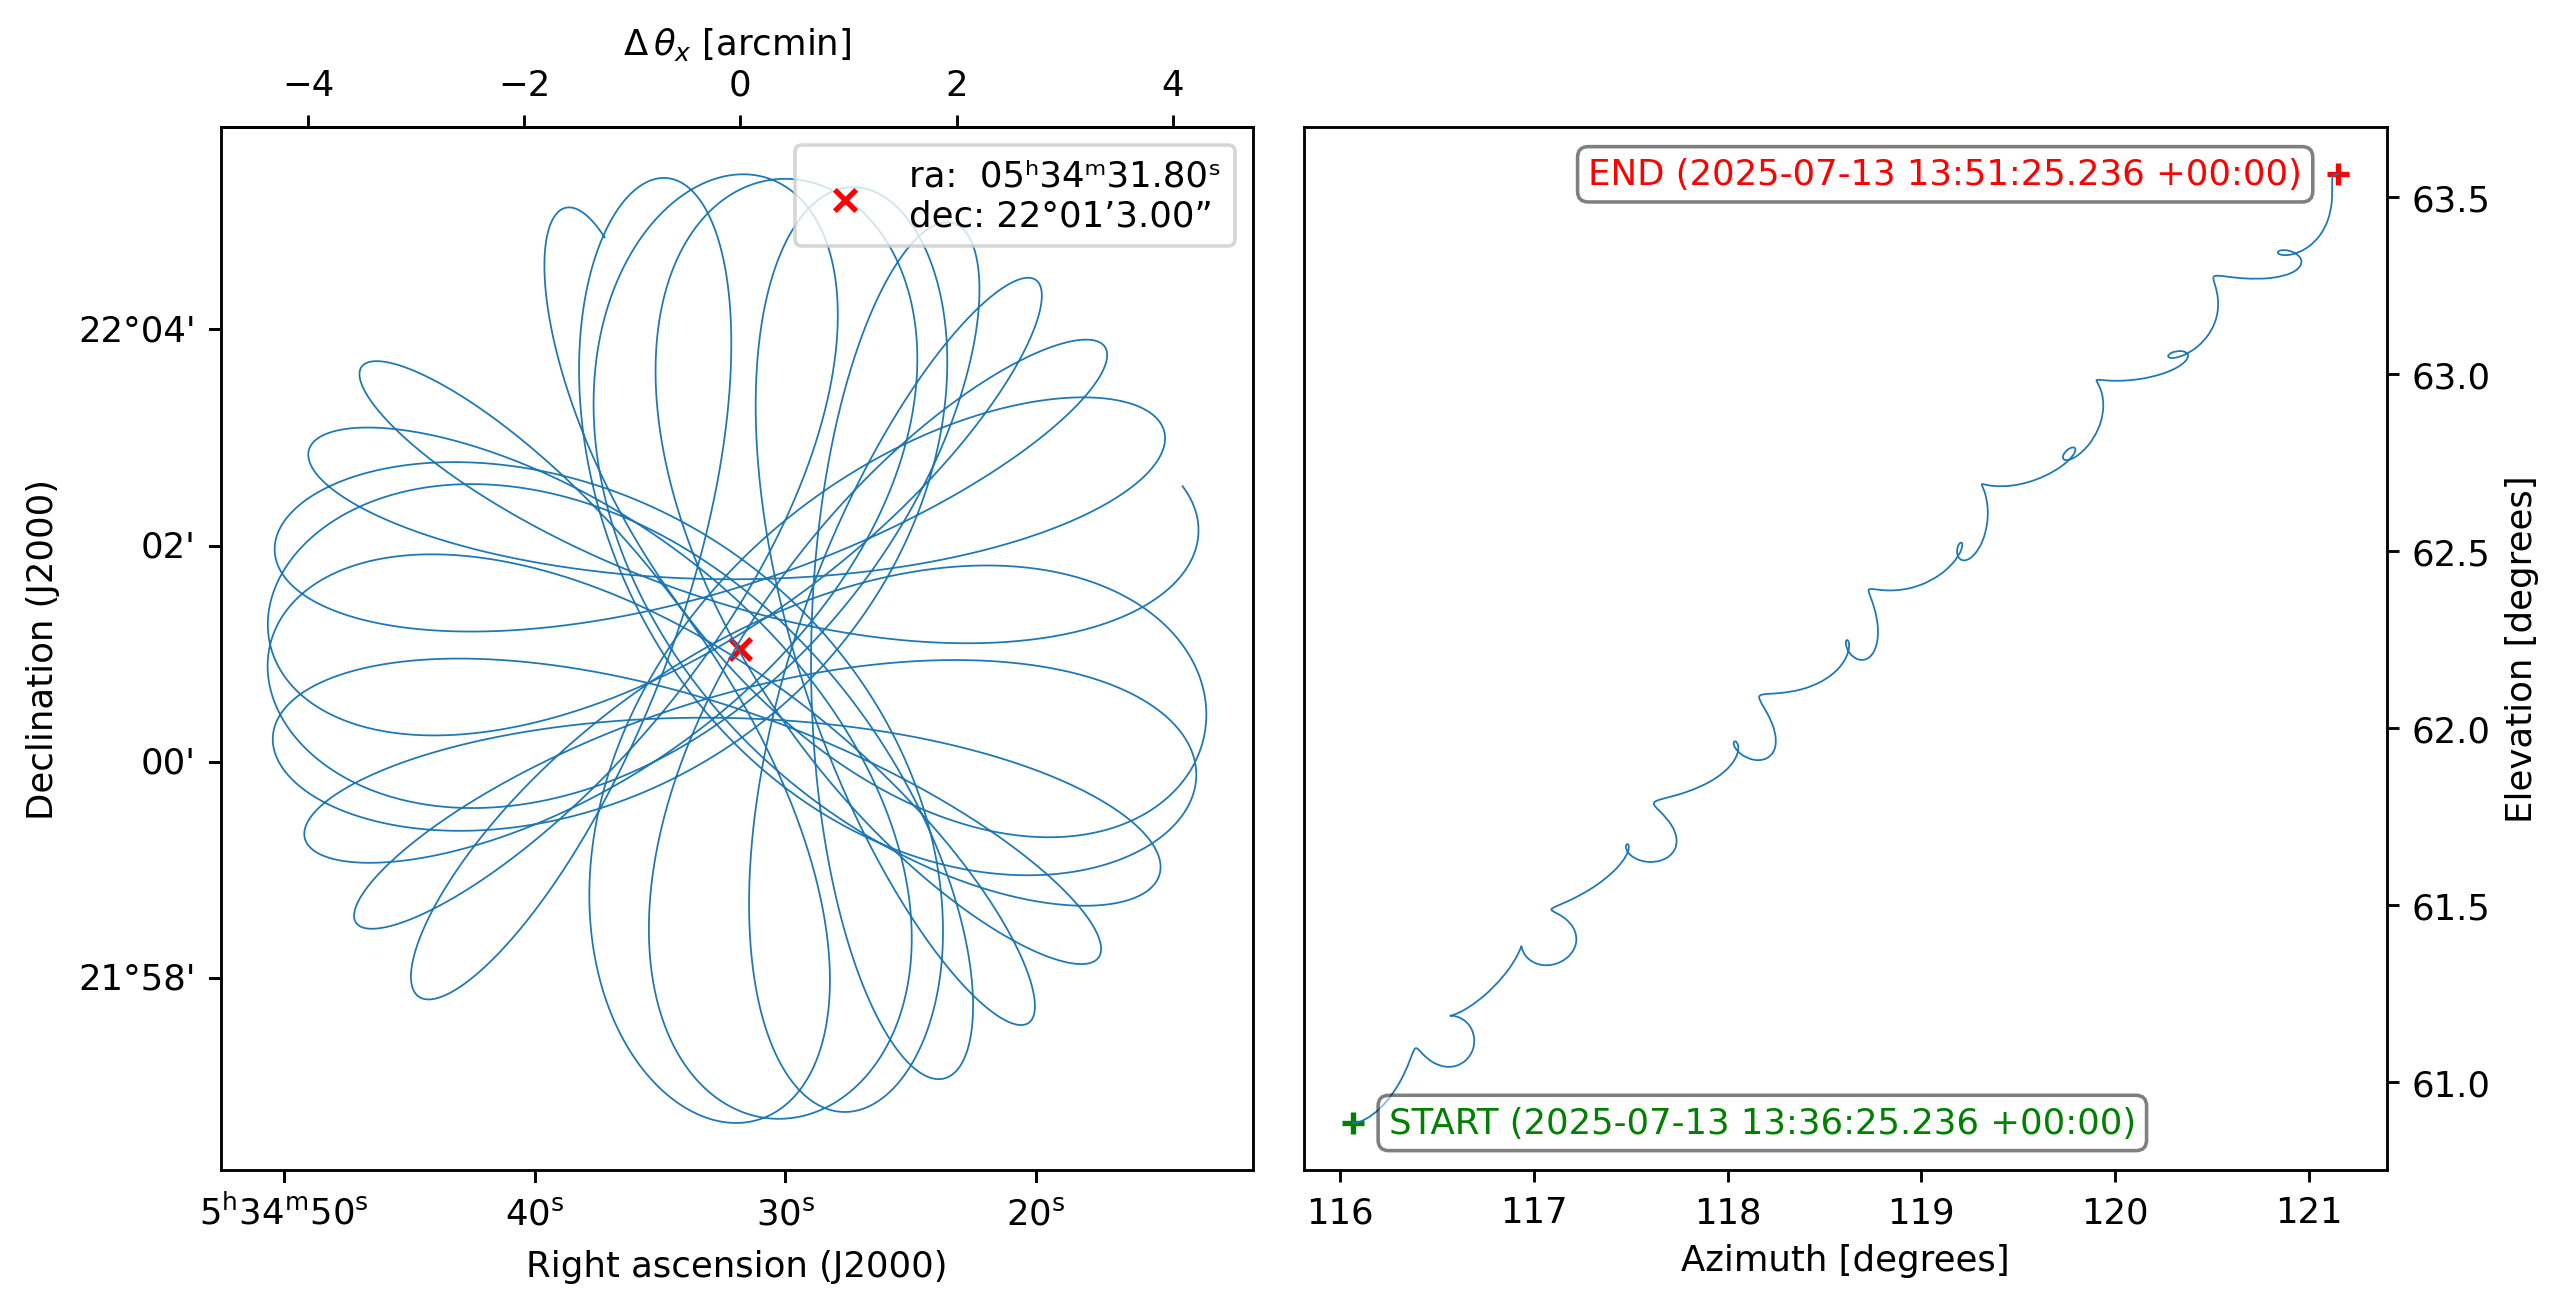

In [2]:
from maria import Planner 

planner = Planner(target=input_map, site="green_bank", el_bounds=(60, 90))
plan = planner.generate_plan(total_duration=900, sample_rate=100)

plan.plot()
print(plan)

Instrument(1 array)
├ arrays:
│            n   FOV baseline      bands polarized
│  array1  217  4.2’      0 m  [m2/f093]     False
│ 
└ bands:
         name     center      width    η      NEP       NET_RJ      NET_CMB  \
   0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK√s  0.6905 mK√s   
   
        FWHM  
   0  9.133”  


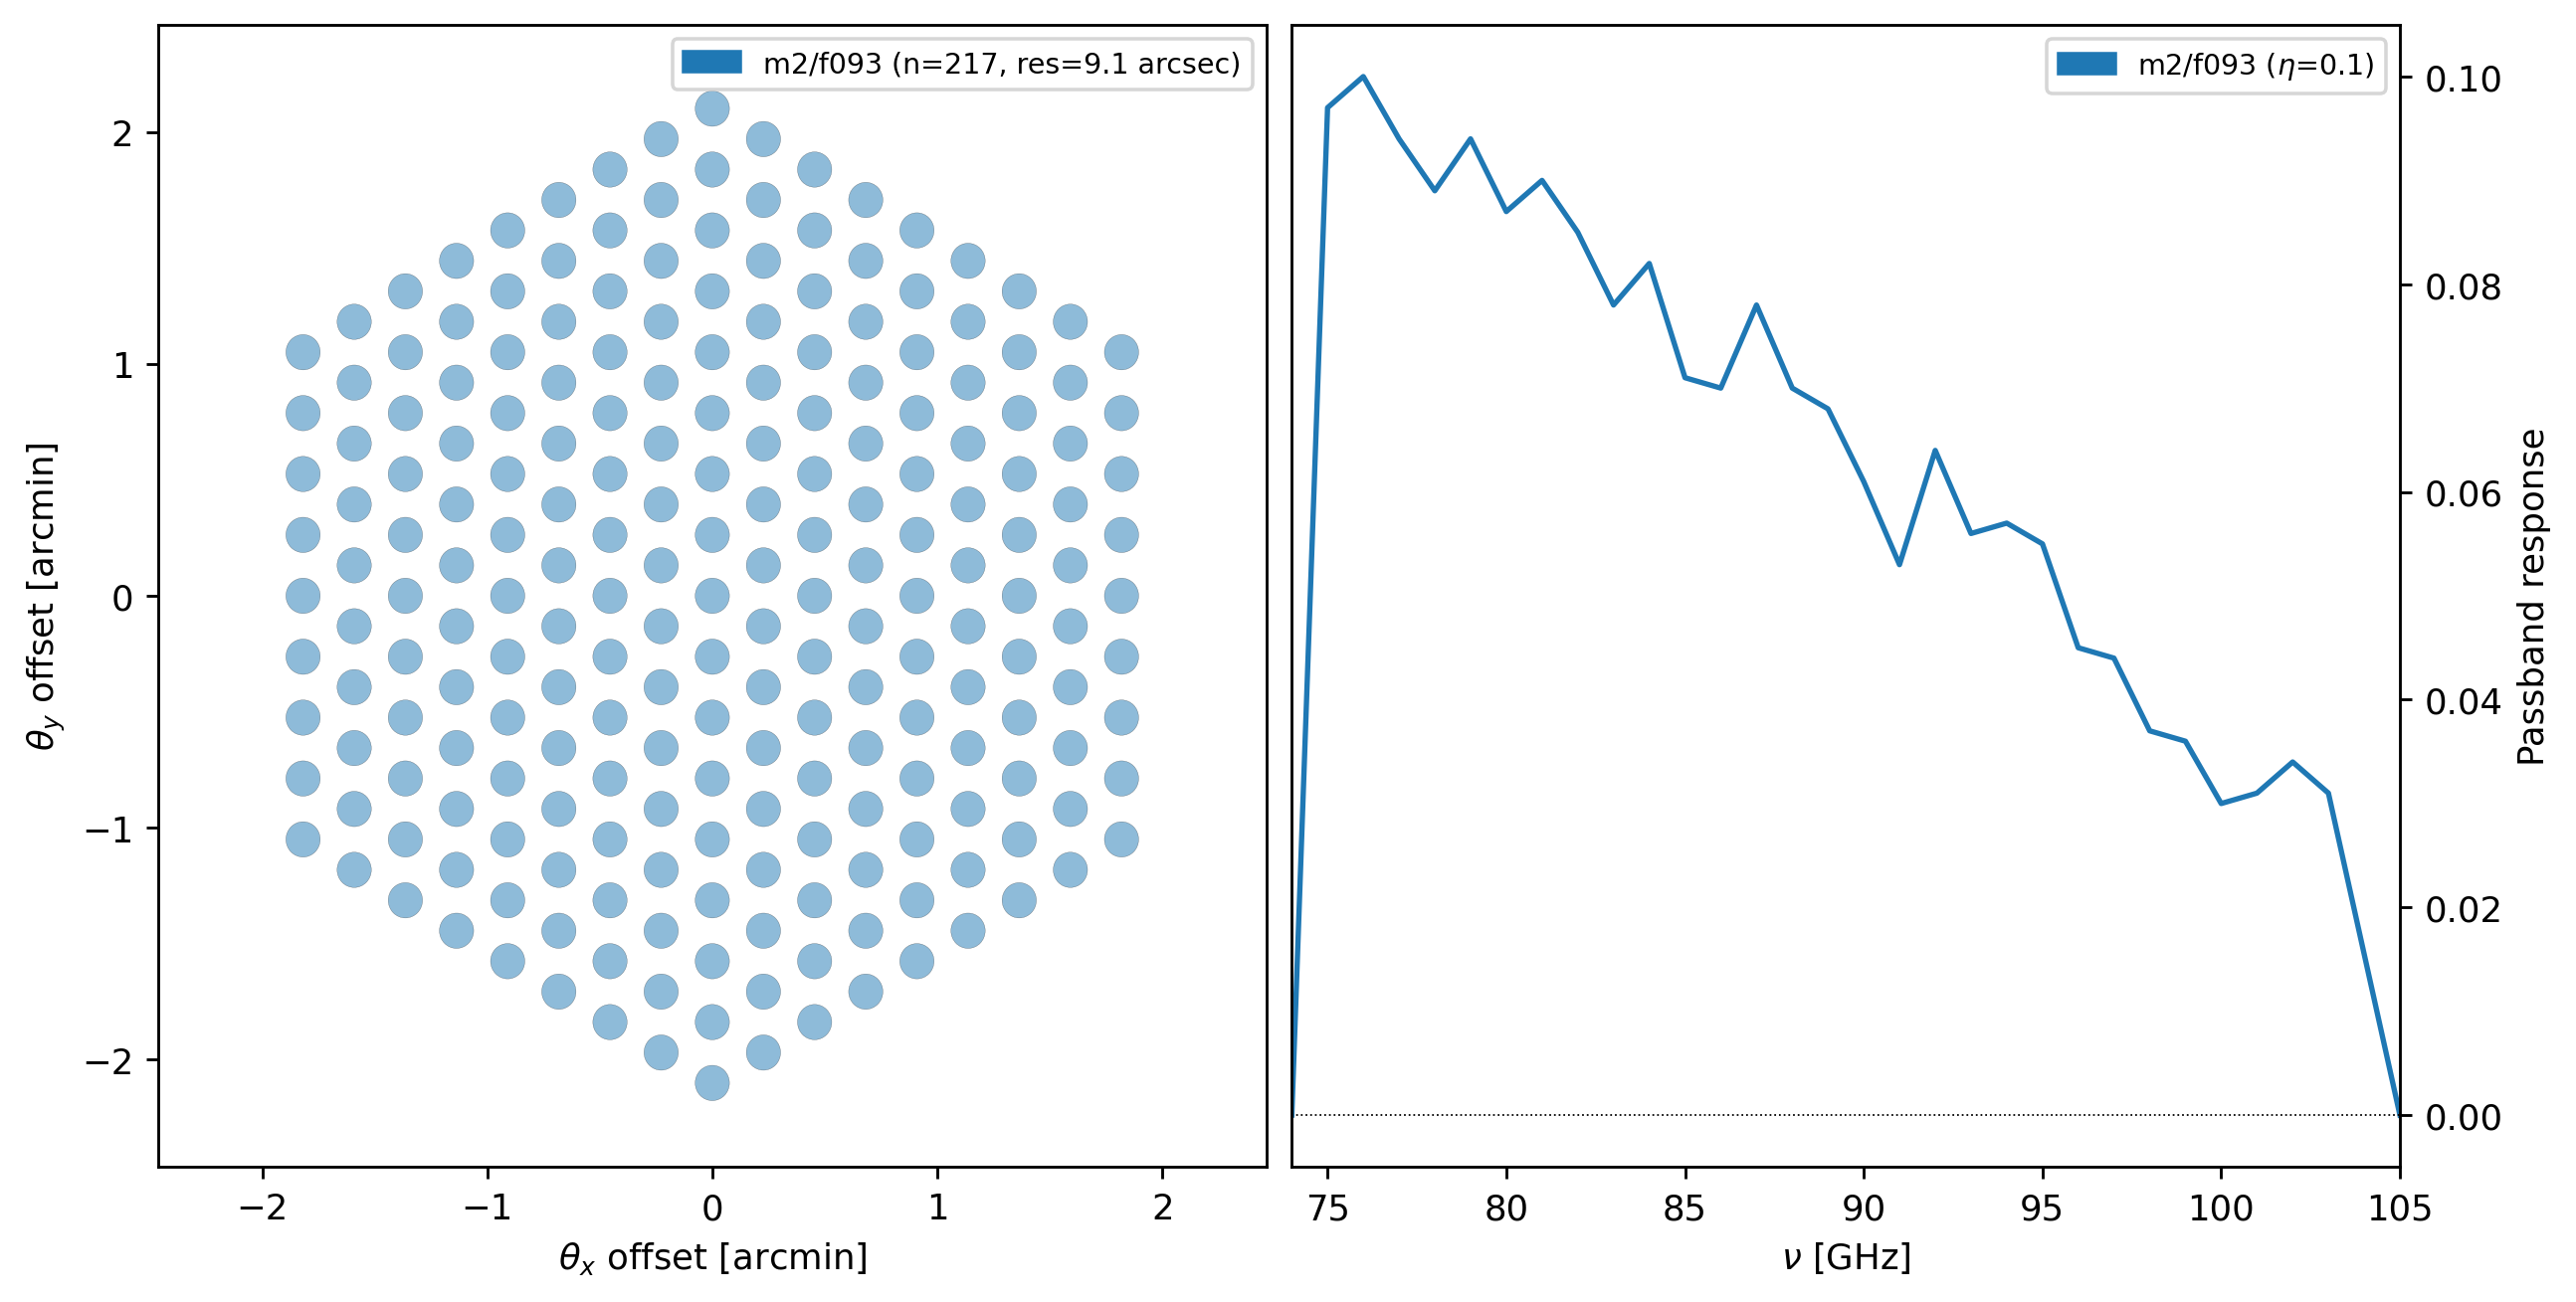

In [3]:
instrument = maria.get_instrument("MUSTANG-2")
print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plan=plan,
    site="green_bank",
    map=input_map,
    atmosphere="2d",
)

print(sim)

Constructing atmosphere:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  10%|█         | 1/10 [00:00<00:08,  1.11it/s]

Constructing atmosphere:  20%|██        | 2/10 [00:01<00:06,  1.31it/s]

Constructing atmosphere:  30%|███       | 3/10 [00:02<00:05,  1.19it/s]

Constructing atmosphere:  40%|████      | 4/10 [00:03<00:04,  1.28it/s]

Constructing atmosphere:  50%|█████     | 5/10 [00:03<00:03,  1.34it/s]

Constructing atmosphere:  60%|██████    | 6/10 [00:04<00:03,  1.24it/s]

Constructing atmosphere:  70%|███████   | 7/10 [00:05<00:02,  1.32it/s]

Constructing atmosphere:  80%|████████  | 8/10 [00:06<00:01,  1.39it/s]

Constructing atmosphere:  90%|█████████ | 9/10 [00:06<00:00,  1.45it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:07<00:00,  1.45it/s]

Constructing atmosphere: 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n   FOV baseline      bands polarized
│ │  array1  217  4.2’      0 m  [m2/f093]     False
│ │ 
│ └ bands:
│          name     center      width    η      NEP       NET_RJ      NET_CMB  \
│    0  m2/f093  86.21 GHz  20.98 GHz  0.1  15 aW√s  0.5711 mK√s  0.6905 mK√s   
│    
│         FWHM  
│    0  9.133”  
├ Site:
│   region: green_bank
│   location:
│     lat: 38°25’59.16” N
│     lon: 79°50’23.28” W
│     alt: 825 m
│   seasonal: True
│   diurnal: True
├ Plan:
│   duration: 900 s
│     start: 2025-07-13 13:36:25.236 +00:00
│     end:   2025-07-13 13:51:25.236 +00:00
│   location: 
│     lat: 38°25’59.16” N
│     lon: 79°50’23.28” W
│     alt: 825 m
│   sample_rate: 100 Hz
│   center:
│     ra:  05ʰ34ᵐ31.80ˢ
│     dec: 22°01’3.00”
│     az(mean): 118.6°
│     el(mean): 62.22°
│   scan_pattern: daisy
│   scan_radius: 8.817’
│   scan_kwargs: {'radius': np.float64(0.07358333333333249)}
├ Atmosphere(10 processes with 10 layers):

Generating turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Generating turbulence:  80%|████████  | 8/10 [00:00<00:00, 72.22it/s]

Generating turbulence: 100%|██████████| 10/10 [00:00<00:00, 66.87it/s]

Sampling turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█         | 1/10 [00:00<00:08,  1.10it/s]

Sampling turbulence:  20%|██        | 2/10 [00:01<00:04,  1.88it/s]

Sampling turbulence:  30%|███       | 3/10 [00:01<00:02,  2.44it/s]

Sampling turbulence:  40%|████      | 4/10 [00:01<00:02,  2.85it/s]

Sampling turbulence:  50%|█████     | 5/10 [00:02<00:01,  2.84it/s]

Sampling turbulence:  60%|██████    | 6/10 [00:02<00:01,  3.11it/s]

Sampling turbulence:  70%|███████   | 7/10 [00:02<00:00,  3.34it/s]

Sampling turbulence:  80%|████████  | 8/10 [00:02<00:00,  3.48it/s]

Sampling turbulence:  90%|█████████ | 9/10 [00:03<00:00,  3.23it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:03<00:00,  3.40it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:02<?, ?it/s, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 1/1 [00:05<00:00,  5.97s/it, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 1/1 [00:05<00:00,  5.97s/it, channel=(0 Hz, inf Hz)]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s, band=m2/f093]

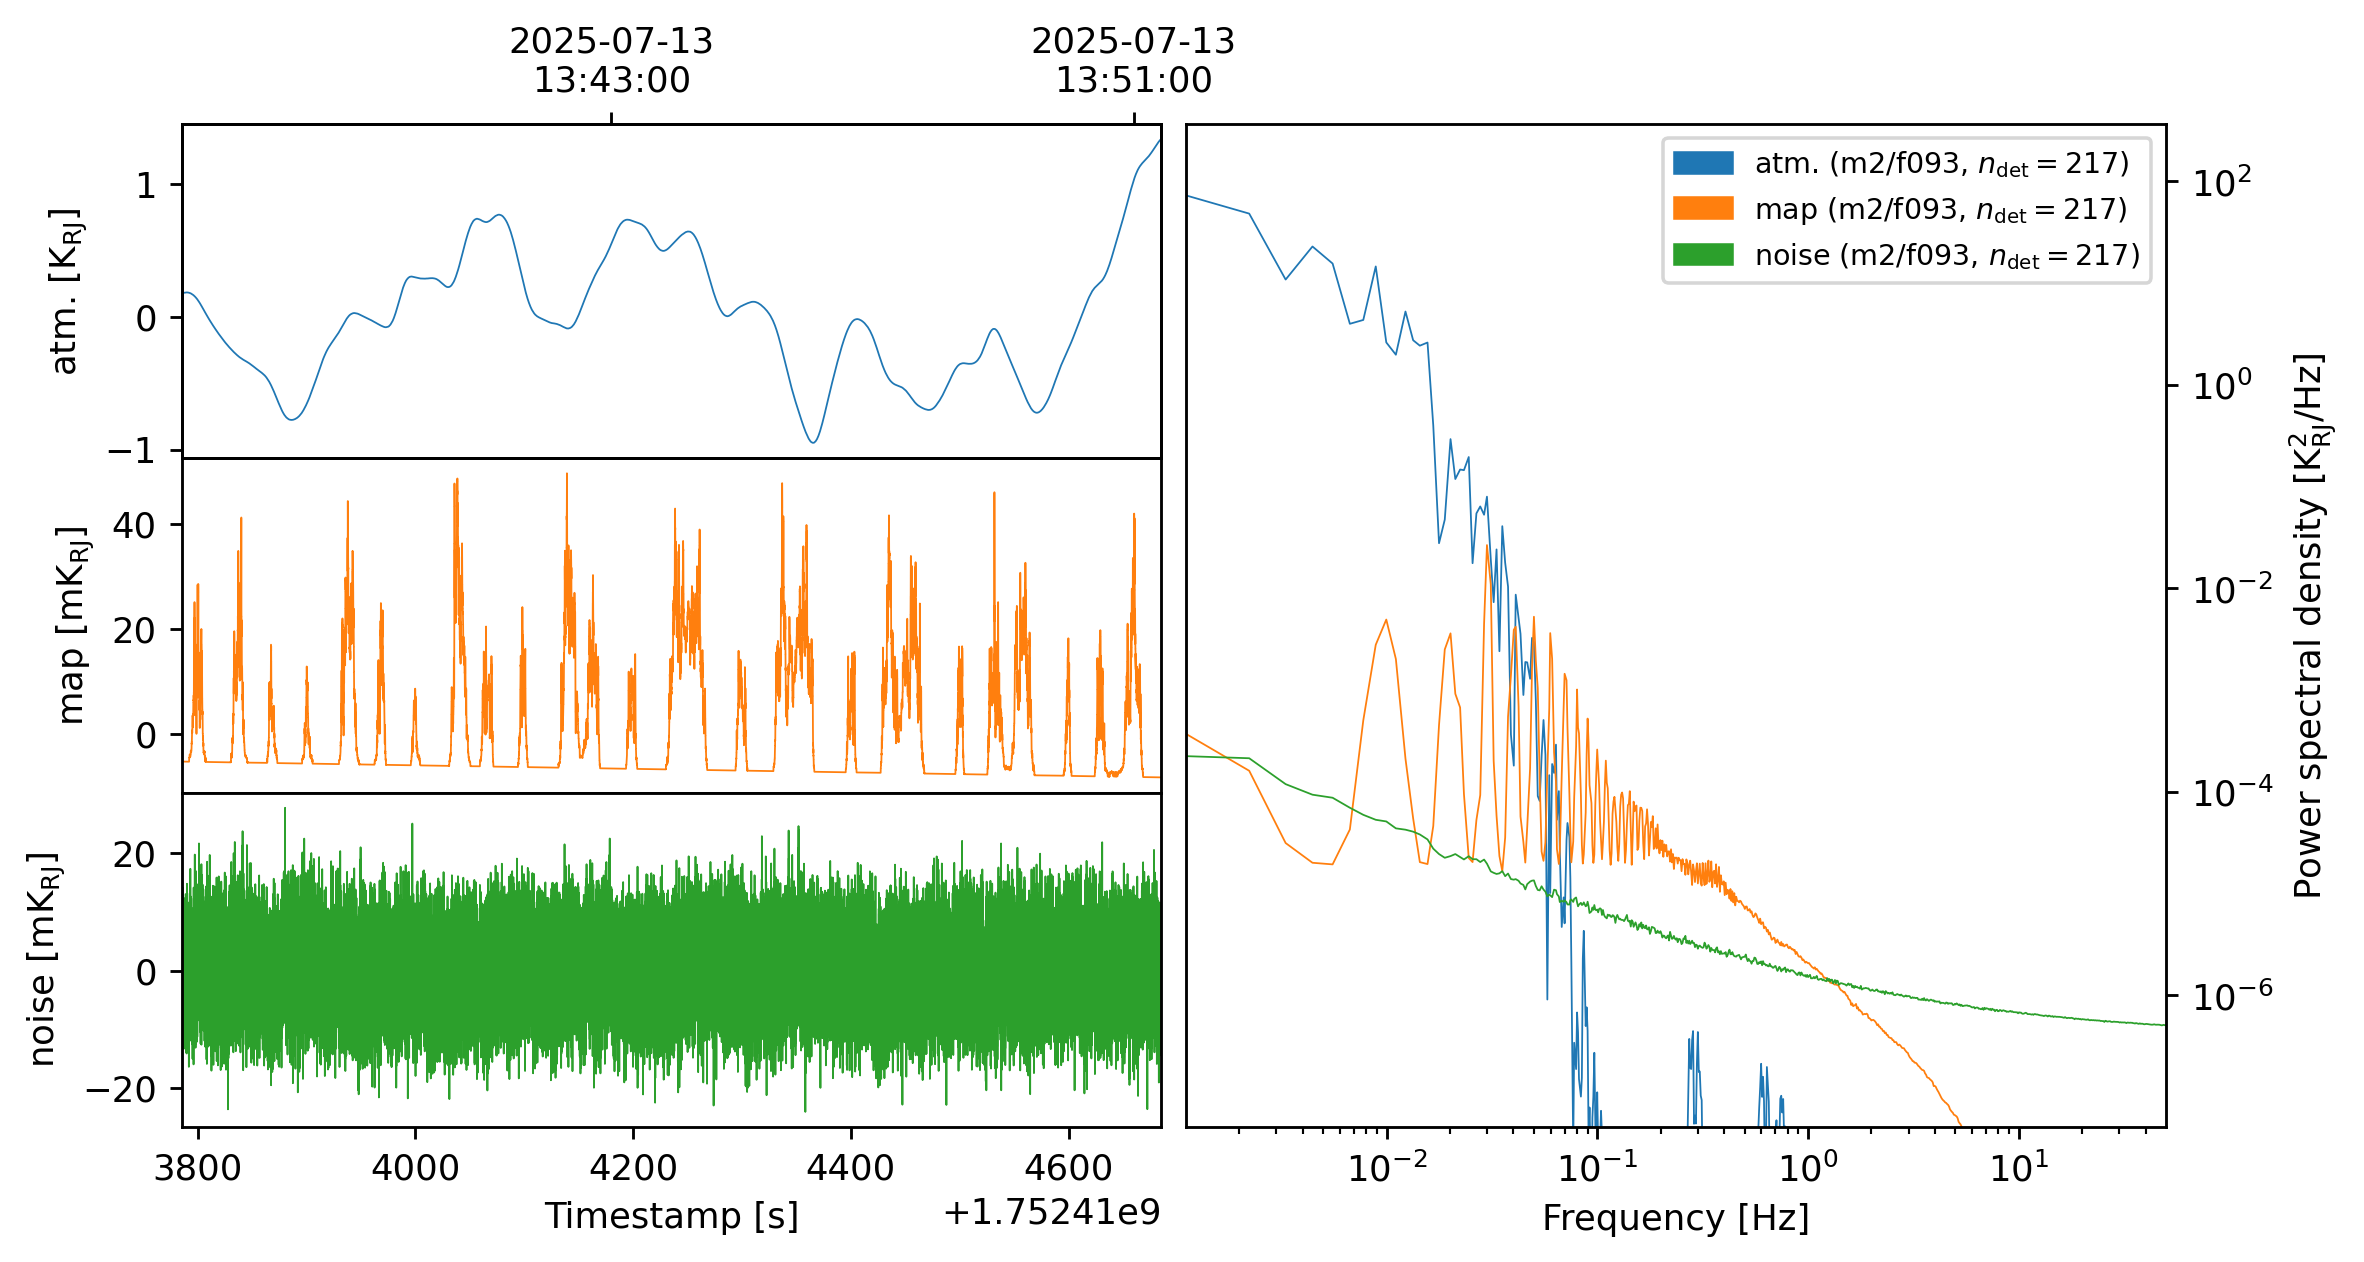

In [5]:
tod = sim.run()
tod.plot()

In [6]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=input_map.center,
    frame="ra_dec",
    width=10 / 60,
    height=10 / 60,
    resolution=0.05 / 60,
    tod_preprocessing={
        "window": {"name": "hamming"},
        "remove_modes": {"modes_to_remove": [0]},
        "remove_spline": {"knot_spacing": 30, "remove_el_gradient": True},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="uK_RJ",
)

mapper.add_tods(tod)
output_map = mapper.run()

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s]

Mapping band m2/f093:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093, stokes=I]

Mapping band m2/f093: 100%|██████████| 1/1 [00:00<00:00,  5.15it/s, band=m2/f093, stokes=I]

Mapping band m2/f093: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s, band=m2/f093, stokes=I]

2025-07-12 17:57:17.602 INFO: Ran mapper for band m2/f093 in 4.963 s.


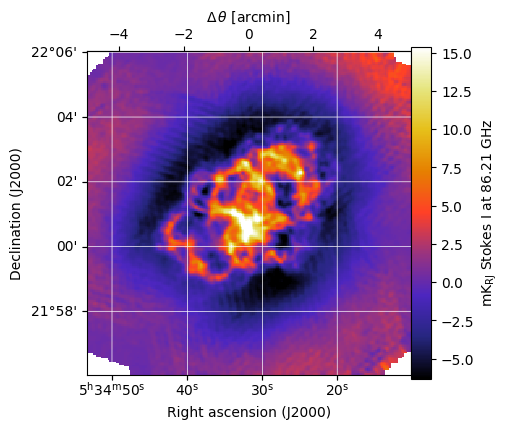

In [7]:
output_map.plot()
output_map.to_fits("/tmp/simulated_mustang_map.fits")